# Importing Libraries

In [2]:
#Load neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import io
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Loading the DataSet

In [5]:
df=pd.read_csv('C:\\Users\\khush\\OneDrive\\Desktop\\Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [41]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [42]:
#discribing the dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Preprocessing of Dataset

In [43]:
#checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.shape

(200, 5)

In [12]:
df.size

1000

In [13]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [20]:
df.dtypes


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [22]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [23]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)


0


# Co-relation Matrix
vizulaizing the data in the form of graphs

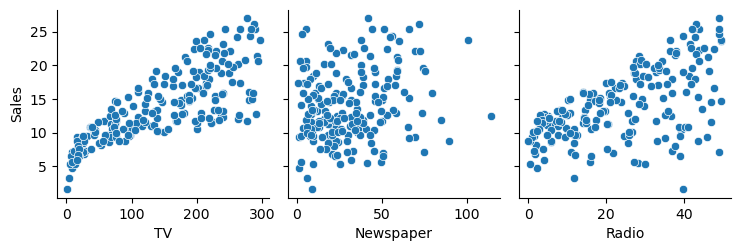

In [24]:
#ScatterPlot Sales vs TV,Newspaper,Radio
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()


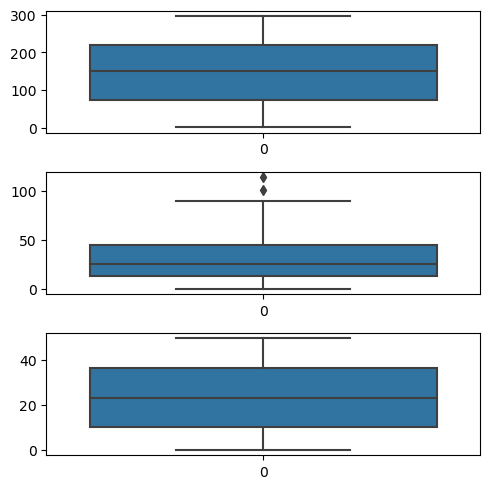

In [26]:
#check for outliers
fig, axs  = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(df['TV'], ax=axs[0])
plt1 = sns.boxplot(df['Newspaper'], ax=axs[1])
plt1 = sns.boxplot(df['Radio'], ax=axs[2])
plt.tight_layout()

<Axes: >

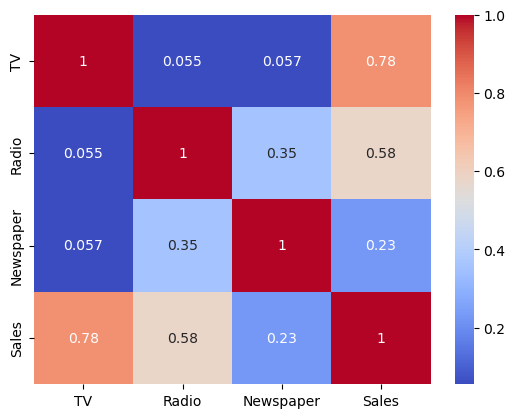

In [28]:
#correaltion visualization
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

#
Prediction of Sales using LinearRegression

Splitting the datset into X,the attributes and y,the target variable i;e sales

In [29]:
x=df.drop('Sales',axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [30]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Training the model

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [33]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [34]:
#fitting the model to the dataset
model.fit(X_train,y_train)

LinearRegression()

#
Evaluating the model 

In [36]:
#Prediction
y_predictions=model.predict(X_test)
y_predictions

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [37]:
print(model.intercept_)
print(model.coef_)

2.99489303049533
[ 0.04458402  0.19649703 -0.00278146]


In [38]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predictions.flatten()})
act_predict.head(10)

,Actual,Predict
0,11.3,10.057396
1,8.4,7.452281
2,8.7,7.019708
3,25.4,24.080297
4,11.7,12.017863
5,8.7,6.537939
6,7.2,12.782869
7,13.2,15.109746
8,9.2,10.769740
9,16.6,16.343580


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predictions))
print("Mean_squared_error:",mean_squared_error(y_test,y_predictions))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predictions)))
print("r2_score:",r2_score(y_test,y_predictions))

Mean_absolute_error: 1.3617813502090275
Mean_squared_error: 4.402118291449685
Squre_Mean_absolute_error: 1.1669538766416723
r2_score: 0.8601145185017868
